Project 1
Thomas Tian

In [1]:
# import the packages needed 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from moviepy.editor import VideoFileClip
%matplotlib inline

In [2]:
# Main function for the image processing
# Input is the 
def line_marking(image):
    test_flag = 1;
    
    original_image = np.copy(image) # used to layer with the processed lines
    #plt.figure()
    #plt.imshow(original_image)
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY) # return the gray version of the image
    
    # Apply Gaussian Smoothing
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(gray,(kernel_size,kernel_size),0)
    
    
    # Apply canny edges function
    low_threshold = 70
    high_threshold = 240
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
 
    # Next we'll create a masked edges image using cv2.fillPoly()
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255   
    imshape = image.shape
    
    # Vertices of the area of interest
    vertices = np.array([[(150,imshape[0]-60),(550, 450), (800 ,450), (imshape[1]-100,imshape[0]-60)]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_edges = cv2.bitwise_and(edges, mask)
    #plt.figure()
    #plt.imshow(masked_edges)
    
    
    # Strat to run the Hough transform process
    rho = 2 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 30     # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 60 #minimum number of pixels making up a line
    max_line_gap = 15   # maximum gap in pixels between connectable line segments
    
    line_image = np.copy(image)*0 # creating a blank to draw lines on
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
    #plt.figure()        
    #plt.imshow(line_image)
    

    # Draw the lines on the edge image
    lines_edges = cv2.addWeighted(original_image, 0.8, line_image, 1, 0) 
    if test_flag == 1:
        plt.figure()
        plt.imshow(mask)
        plt.figure()
        plt.imshow(original_image)
        plt.figure()
        plt.imshow(lines_edges)
    
    return lines_edges

# Testing block: Extract frames from the testing video for image testing

array([[[ 73, 108, 147],
        [ 73, 108, 147],
        [ 74, 109, 148],
        ..., 
        [ 63, 106, 146],
        [ 63, 106, 146],
        [ 63, 106, 146]],

       [[ 72, 107, 146],
        [ 73, 108, 147],
        [ 73, 108, 147],
        ..., 
        [ 63, 106, 146],
        [ 63, 106, 146],
        [ 63, 106, 146]],

       [[ 70, 107, 146],
        [ 70, 107, 146],
        [ 71, 108, 147],
        ..., 
        [ 63, 106, 146],
        [ 63, 106, 146],
        [ 63, 106, 146]],

       ..., 
       [[ 78,  61,  57],
        [ 81,  64,  60],
        [ 75,  58,  54],
        ..., 
        [ 67,  53,  53],
        [ 77,  62,  62],
        [ 84,  70,  70]],

       [[ 77,  60,  56],
        [ 80,  63,  59],
        [ 74,  58,  54],
        ..., 
        [ 58,  43,  43],
        [ 66,  52,  52],
        [ 70,  56,  56]],

       [[ 77,  60,  56],
        [ 79,  62,  58],
        [ 73,  56,  52],
        ..., 
        [ 58,  44,  44],
        [ 64,  50,  50],
        [ 62,  48,

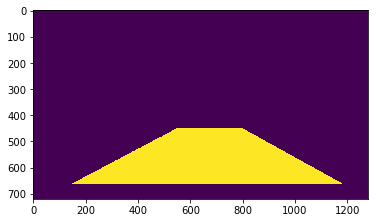

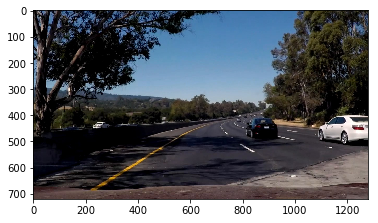

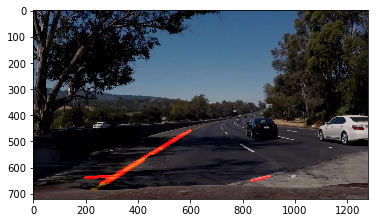

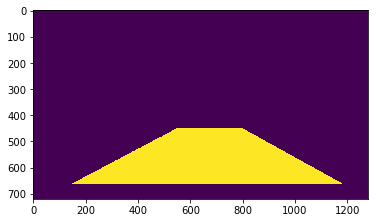

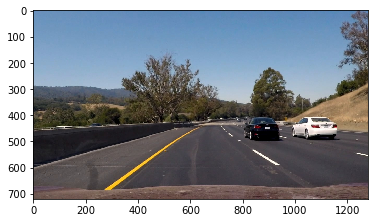

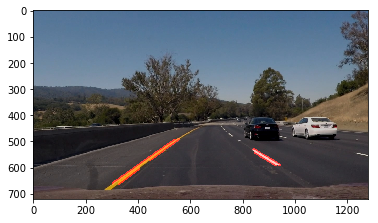

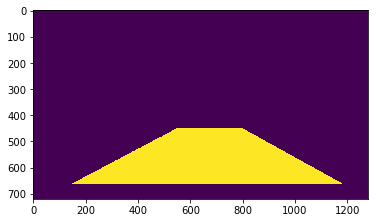

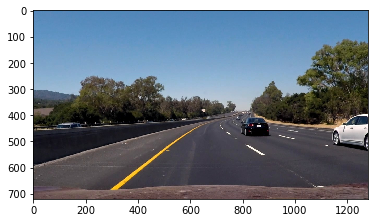

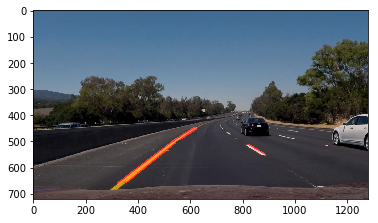

In [3]:
image1 = mpimg.imread('test_image_1.jpg')
line_marking(image1)
image2 = mpimg.imread('test_image_2.jpg')
line_marking(image2)
image3 = mpimg.imread('test_image_3.jpg')
line_marking(image3)

Import the video and seprate the video into frames